# NOAA Dataset: Handling Missing Values

### 1. Setup and Data Loading
Loading the previously combined dataset to begin the process of handling missing values.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

In [10]:
files = ['../data/NOAA_46041.csv', '../data/NOAA_46050.csv', '../data/NOAA_46243.csv']
dataframes = [pd.read_csv(file) for file in files]
df = pd.concat(dataframes, ignore_index=True)

df['date_time'] = pd.to_datetime(df['date_time'])

### 2. Quantify Missing Data
Calculating and visualizing the extent of missing data across all features.

In [11]:
missing_data = df.isnull().sum()
missing_percentage = (missing_data / len(df)) * 100
missing_info = pd.DataFrame({'Missing Values': missing_data, 'Percentage': missing_percentage})
print(missing_info)

                              Missing Values  Percentage
station_id                                 0    0.000000
latitude (degrees north)                   0    0.000000
longitude (degrees east)                   0    0.000000
date_time                                  0    0.000000
air_temperature (C°)                    6496   89.984762
sea_level_pressure (hPa)                6496   89.984762
wind_speed (m/s)                        6496   89.984762
gust_speed (m/s)                        6496   89.984762
significant_wave_height (m)             5052   69.981992
dominant_wave_period (s)                5052   69.981992
sea_surface_temperature (C°)            5051   69.968140
wind_speed_cwind (m/s)                  2899   40.157917


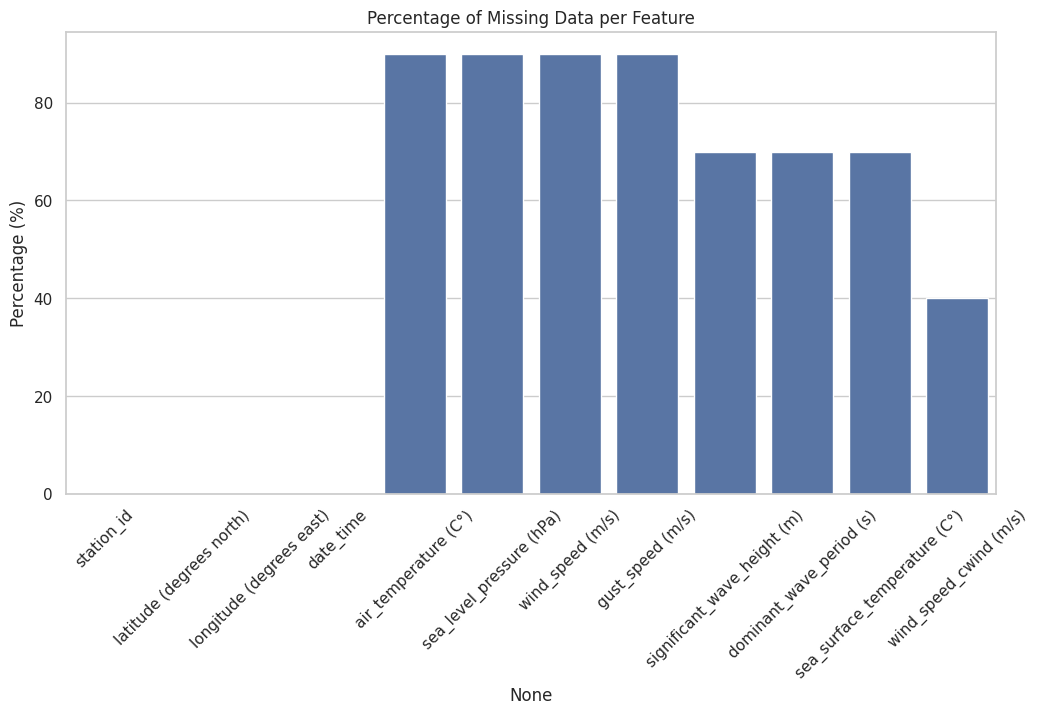

In [12]:
plt.figure(figsize=(12, 6))
sns.barplot(x=missing_info.index, y=missing_info['Percentage'])
plt.xticks(rotation=45)
plt.title('Percentage of Missing Data per Feature')
plt.ylabel('Percentage (%)')
plt.show()

### 3. Imputation Strategy
Applying appropriate techniques to fill in missing values.

For time-series data, forward-fill (`ffill`) and backward-fill (`bfill`) are often more appropriate than simple mean/median imputation, as they preserve the temporal sequence of the data. Here, I will use `ffill` followed by `bfill` to handle any remaining NaNs at the beginning of the series.

In [13]:
df_cleaned = df.sort_values(by=['station_id', 'date_time'])
df_cleaned = df_cleaned.ffill().bfill()

print("Missing values after imputation:")
print(df_cleaned.isnull().sum())

Missing values after imputation:
station_id                      0
latitude (degrees north)        0
longitude (degrees east)        0
date_time                       0
air_temperature (C°)            0
sea_level_pressure (hPa)        0
wind_speed (m/s)                0
gust_speed (m/s)                0
significant_wave_height (m)     0
dominant_wave_period (s)        0
sea_surface_temperature (C°)    0
wind_speed_cwind (m/s)          0
dtype: int64


### 4. Save Cleaned Data
Saving the processed DataFrame to a new CSV file for use in the prediction model.

In [14]:
df_cleaned.to_csv('../data/NOAA_data_cleaned.csv', index=False)